In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, time
import matplotlib.pyplot as plt

In [2]:
quotes_full = pd.read_excel('C:/Users/petul/OneDrive/Bureau/Master 2/Semestre 2/Market Microstructure/Final project/CHV_quotes_full.xlsx')
quotes_full

,SYMBOL,DATE,TIME,BID,OFR,BIDSIZ,OFRSIZ,MODE,EX,MMID
0,CHV,1998-08-03,08:59:53,0.0000,0.000,0,0,12,T,SHAW
1,CHV,1998-08-03,08:59:53,0.0000,0.000,0,0,12,T,TRIM
2,CHV,1998-08-03,08:59:53,0.0000,0.000,0,0,12,T,MADF
3,CHV,1998-08-03,09:32:41,82.5625,82.625,10,25,10,N,NaN
4,CHV,1998-08-03,09:32:44,82.3750,82.750,1,1,12,M,NaN
...,...,...,...,...,...,...,...,...,...,...
751952,CHV,1999-04-30,16:02:07,99.5000,99.875,1,1,12,X,NaN
751953,CHV,1999-04-30,16:03:11,99.3750,99.875,1,1,3,B,NaN
751954,CHV,1999-04-30,16:13:05,99.5000,99.875,1,1,8,T,MADF
751955,CHV,1999-04-30,16:33:07,99.5000,99.875,1,1,3,M,NaN


In [3]:
trades_full= pd.read_excel('C:/Users/petul/OneDrive/Bureau/Master 2/Semestre 2/Market Microstructure/Final project/CHV_trades_full.xlsx')
trades_full

,SYMBOL,DATE,TIME,PRICE,SIZE,G127,CORR,COND,EX
0,CHV,1998-08-03,09:32:48,82.6250,1000,0,0,NaN,T
1,CHV,1998-08-03,09:32:50,82.6250,33800,0,0,NaN,N
2,CHV,1998-08-03,09:32:54,82.6250,100,0,0,NaN,M
3,CHV,1998-08-03,09:32:54,82.6250,100,0,0,NaN,M
4,CHV,1998-08-03,09:32:54,82.6250,100,0,0,NaN,M
...,...,...,...,...,...,...,...,...,...
215623,CHV,1999-04-30,16:02:12,99.7500,68000,200,0,NaN,N
215624,CHV,1999-04-30,16:13:29,99.9375,500,0,8,NaN,T
215625,CHV,1999-04-30,16:29:01,99.7500,6000,0,0,Z,T
215626,CHV,1999-04-30,16:31:23,99.9375,500,0,10,NaN,T


### Step 2: We initiate the trading with one trading day

In [4]:
# Convert the date column to datetime format
trades_full['DATE'] = pd.to_datetime(trades_full['DATE'])

In [5]:
quotes_full['DATE'] = pd.to_datetime(quotes_full['DATE'])

In [6]:
# Specify the date range: our trading day correspond to the 1998/08/03
start_date = pd.Timestamp('1998-08-03')
end_date = pd.Timestamp('1998-08-03')

In [7]:
# Filter the trade DataFrame based on the date range
onedate_trades_full = trades_full[(trades_full['DATE'] >= start_date) & (trades_full['DATE'] <= end_date)]
onedate_trades_full

,SYMBOL,DATE,TIME,PRICE,SIZE,G127,CORR,COND,EX
0,CHV,1998-08-03,09:32:48,82.625,1000,0,0,NaN,T
1,CHV,1998-08-03,09:32:50,82.625,33800,0,0,NaN,N
2,CHV,1998-08-03,09:32:54,82.625,100,0,0,NaN,M
3,CHV,1998-08-03,09:32:54,82.625,100,0,0,NaN,M
4,CHV,1998-08-03,09:32:54,82.625,100,0,0,NaN,M
...,...,...,...,...,...,...,...,...,...
852,CHV,1998-08-03,16:00:07,81.125,2300,0,0,NaN,N
853,CHV,1998-08-03,16:00:12,81.125,1100,0,0,NaN,N
854,CHV,1998-08-03,16:00:13,81.125,800,0,0,NaN,N
855,CHV,1998-08-03,16:00:58,81.125,46200,0,0,NaN,N


In [8]:
# Filter the quote DataFrame based on the date range
onedate_quotes_full = quotes_full[(quotes_full['DATE'] >= start_date) & (quotes_full['DATE'] <= end_date)]
onedate_quotes_full

,SYMBOL,DATE,TIME,BID,OFR,BIDSIZ,OFRSIZ,MODE,EX,MMID
0,CHV,1998-08-03,08:59:53,0.0000,0.0000,0,0,12,T,SHAW
1,CHV,1998-08-03,08:59:53,0.0000,0.0000,0,0,12,T,TRIM
2,CHV,1998-08-03,08:59:53,0.0000,0.0000,0,0,12,T,MADF
3,CHV,1998-08-03,09:32:41,82.5625,82.6250,10,25,10,N,NaN
4,CHV,1998-08-03,09:32:44,82.3750,82.7500,1,1,12,M,NaN
...,...,...,...,...,...,...,...,...,...,...
3405,CHV,1998-08-03,16:03:14,80.8750,81.2500,1,1,3,B,NaN
3406,CHV,1998-08-03,16:04:21,80.9375,81.3125,1,1,12,P,NaN
3407,CHV,1998-08-03,16:04:25,80.9375,81.3125,1,6,12,C,NaN
3408,CHV,1998-08-03,16:12:36,80.9375,81.3125,1,1,8,T,MADF


In [9]:
# we drop the unused colums symbol, G127, CORR, COND, EX
onedate_trades_full = onedate_trades_full.drop(columns= ['SYMBOL','G127', 'CORR', 'COND','EX'])
onedate_trades_full

,DATE,TIME,PRICE,SIZE
0,1998-08-03,09:32:48,82.625,1000
1,1998-08-03,09:32:50,82.625,33800
2,1998-08-03,09:32:54,82.625,100
3,1998-08-03,09:32:54,82.625,100
4,1998-08-03,09:32:54,82.625,100
...,...,...,...,...
852,1998-08-03,16:00:07,81.125,2300
853,1998-08-03,16:00:12,81.125,1100
854,1998-08-03,16:00:13,81.125,800
855,1998-08-03,16:00:58,81.125,46200


In [10]:
# We drop the unused colums
onedate_quotes_full = onedate_quotes_full.drop(columns=['SYMBOL','MODE','EX'])
onedate_quotes_full

,DATE,TIME,BID,OFR,BIDSIZ,OFRSIZ,MMID
0,1998-08-03,08:59:53,0.0000,0.0000,0,0,SHAW
1,1998-08-03,08:59:53,0.0000,0.0000,0,0,TRIM
2,1998-08-03,08:59:53,0.0000,0.0000,0,0,MADF
3,1998-08-03,09:32:41,82.5625,82.6250,10,25,NaN
4,1998-08-03,09:32:44,82.3750,82.7500,1,1,NaN
...,...,...,...,...,...,...,...
3405,1998-08-03,16:03:14,80.8750,81.2500,1,1,NaN
3406,1998-08-03,16:04:21,80.9375,81.3125,1,1,NaN
3407,1998-08-03,16:04:25,80.9375,81.3125,1,6,NaN
3408,1998-08-03,16:12:36,80.9375,81.3125,1,1,MADF


### Step 3: Filtering the dataframes

In [11]:
onedate_trades_full= onedate_trades_full[~(onedate_trades_full== 0).any(axis=1)]
onedate_trades_full

,DATE,TIME,PRICE,SIZE
0,1998-08-03,09:32:48,82.625,1000
1,1998-08-03,09:32:50,82.625,33800
2,1998-08-03,09:32:54,82.625,100
3,1998-08-03,09:32:54,82.625,100
4,1998-08-03,09:32:54,82.625,100
...,...,...,...,...
852,1998-08-03,16:00:07,81.125,2300
853,1998-08-03,16:00:12,81.125,1100
854,1998-08-03,16:00:13,81.125,800
855,1998-08-03,16:00:58,81.125,46200


In [12]:
onedate_quotes_full= onedate_quotes_full[~(onedate_quotes_full== 0).any(axis=1)]
onedate_quotes_full

,DATE,TIME,BID,OFR,BIDSIZ,OFRSIZ,MMID
3,1998-08-03,09:32:41,82.5625,82.6250,10,25,NaN
4,1998-08-03,09:32:44,82.3750,82.7500,1,1,NaN
5,1998-08-03,09:32:44,82.4375,82.7500,1,1,NaN
6,1998-08-03,09:32:44,82.4375,82.7500,1,1,NaN
7,1998-08-03,09:32:45,82.3125,82.8125,1,1,NaN
...,...,...,...,...,...,...,...
3405,1998-08-03,16:03:14,80.8750,81.2500,1,1,NaN
3406,1998-08-03,16:04:21,80.9375,81.3125,1,1,NaN
3407,1998-08-03,16:04:25,80.9375,81.3125,1,6,NaN
3408,1998-08-03,16:12:36,80.9375,81.3125,1,1,MADF


### Step 4: merge our two data frame as of: date with 1s tolerance

In [13]:
# Determining the most active MM
onedate_quotes_full_NAN = onedate_quotes_full.dropna(subset=['MMID'])
counts = onedate_quotes_full_NAN['MMID'].value_counts()
most_active_MM = counts.idxmax()
most_active_MM

'TRIM'

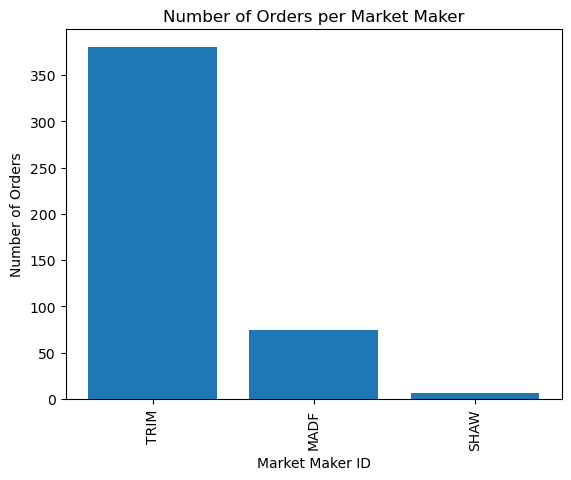

In [14]:
import matplotlib.pyplot as plt
# Calculating the number of orders per market maker
counts_MM = onedate_quotes_full['MMID'].value_counts()

# We plot the number of each MM to see their frequence
plt.bar(counts_MM.index, counts_MM.values)

# Axes and plot titles
plt.xlabel('Market Maker ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Market Maker')

# plot forms to have a better view
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [15]:
#we keep the TRIM MM as the most active one
onedate_quotes_full_active_MM = onedate_quotes_full_NAN[onedate_quotes_full_NAN["MMID"] == most_active_MM]
onedate_quotes_full_active_MM.reset_index(drop = True)

,DATE,TIME,BID,OFR,BIDSIZ,OFRSIZ,MMID
0,1998-08-03,09:33:08,82.5000,82.6250,1,1,TRIM
1,1998-08-03,09:33:31,82.5000,82.6250,1,1,TRIM
2,1998-08-03,09:34:04,82.5625,82.6875,1,1,TRIM
3,1998-08-03,09:34:29,82.3750,82.6250,1,1,TRIM
4,1998-08-03,09:35:22,82.3125,82.6250,1,1,TRIM
...,...,...,...,...,...,...,...
375,1998-08-03,15:58:19,81.0000,81.1875,1,1,TRIM
376,1998-08-03,15:58:41,80.9375,81.1250,1,1,TRIM
377,1998-08-03,15:58:46,81.0000,81.1875,1,1,TRIM
378,1998-08-03,15:58:55,81.0000,81.1250,1,1,TRIM


In [16]:
# we set the format of the time by hour, min, seconds

In [17]:
onedate_trades_full['TIME'] = pd.to_datetime(onedate_trades_full['TIME'], format='%H:%M:%S')

In [18]:
onedate_trades_full = onedate_trades_full.sort_values('TIME')

In [19]:
onedate_quotes_full.loc[:, 'TIME'] = pd.to_datetime(onedate_quotes_full['TIME'], format='%H:%M:%S')

/var/folders/26/szzbkj9j48v3pw6g5hl1l3rc0000gn/T/ipykernel_9357/868628134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onedate_quotes_full.loc[:, 'TIME'] = pd.to_datetime(onedate_quotes_full['TIME'], format='%H:%M:%S')


In [20]:
onedate_quotes_full = onedate_quotes_full.sort_values('TIME')

In [21]:
# we now merge the dataframe with a tolerance of 1 second
df_onedate_new=pd.merge_asof(onedate_trades_full,onedate_quotes_full,
                      on='TIME',
                      by='DATE',
                      tolerance=pd.Timedelta('1s'),
                      allow_exact_matches=False)
df_onedate_new

,DATE,TIME,PRICE,SIZE,BID,OFR,BIDSIZ,OFRSIZ,MMID
0,1998-08-03,1900-01-01 09:32:48,82.625,1000,NaN,NaN,NaN,NaN,NaN
1,1998-08-03,1900-01-01 09:32:50,82.625,33800,NaN,NaN,NaN,NaN,NaN
2,1998-08-03,1900-01-01 09:32:54,82.625,100,82.4375,82.75,2.0,4.0,NaN
3,1998-08-03,1900-01-01 09:32:54,82.625,100,82.4375,82.75,2.0,4.0,NaN
4,1998-08-03,1900-01-01 09:32:54,82.625,100,82.4375,82.75,2.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...
852,1998-08-03,1900-01-01 16:00:07,81.125,2300,NaN,NaN,NaN,NaN,NaN
853,1998-08-03,1900-01-01 16:00:12,81.125,1100,NaN,NaN,NaN,NaN,NaN
854,1998-08-03,1900-01-01 16:00:13,81.125,800,NaN,NaN,NaN,NaN,NaN
855,1998-08-03,1900-01-01 16:00:58,81.125,46200,NaN,NaN,NaN,NaN,NaN


In [22]:
# we drop the na to clean our dataframe
df_onedate_new = df_onedate_new.dropna()
df_onedate_new

,DATE,TIME,PRICE,SIZE,BID,OFR,BIDSIZ,OFRSIZ,MMID
20,1998-08-03,1900-01-01 09:33:09,82.6250,100,82.5000,82.6250,1.0,1.0,TRIM
21,1998-08-03,1900-01-01 09:33:09,82.6250,300,82.5000,82.6250,1.0,1.0,TRIM
27,1998-08-03,1900-01-01 09:34:30,82.5625,100,82.3750,82.6250,1.0,1.0,TRIM
116,1998-08-03,1900-01-01 10:01:44,81.6250,15500,81.5625,81.7500,1.0,1.0,TRIM
131,1998-08-03,1900-01-01 10:11:06,81.5000,11500,81.3750,81.5625,1.0,1.0,TRIM
139,1998-08-03,1900-01-01 10:15:11,81.5000,1200,81.4375,81.5625,1.0,1.0,TRIM
178,1998-08-03,1900-01-01 10:29:52,81.5000,1600,81.3125,81.6875,17.0,1.0,TRIM
249,1998-08-03,1900-01-01 11:09:46,81.8125,1000,81.6875,81.8750,1.0,1.0,TRIM
278,1998-08-03,1900-01-01 11:30:36,81.5000,1000,81.2500,81.6875,1.0,1.0,MADF
413,1998-08-03,1900-01-01 12:48:18,81.0000,100,80.8750,81.0625,1.0,1.0,TRIM


In [23]:
# merging verticaly the dataframe and taking just the trades after 9h30 and before 16H
start_time = time(9, 30)
end_time = time(16, 0)

In [24]:
df_onedate_new_filter = df_onedate_new[(df_onedate_new['TIME'].dt.time >= start_time) & (df_onedate_new['TIME'].dt.time <= end_time)]
df_onedate_new_filter

,DATE,TIME,PRICE,SIZE,BID,OFR,BIDSIZ,OFRSIZ,MMID
20,1998-08-03,1900-01-01 09:33:09,82.6250,100,82.5000,82.6250,1.0,1.0,TRIM
21,1998-08-03,1900-01-01 09:33:09,82.6250,300,82.5000,82.6250,1.0,1.0,TRIM
27,1998-08-03,1900-01-01 09:34:30,82.5625,100,82.3750,82.6250,1.0,1.0,TRIM
116,1998-08-03,1900-01-01 10:01:44,81.6250,15500,81.5625,81.7500,1.0,1.0,TRIM
131,1998-08-03,1900-01-01 10:11:06,81.5000,11500,81.3750,81.5625,1.0,1.0,TRIM
139,1998-08-03,1900-01-01 10:15:11,81.5000,1200,81.4375,81.5625,1.0,1.0,TRIM
178,1998-08-03,1900-01-01 10:29:52,81.5000,1600,81.3125,81.6875,17.0,1.0,TRIM
249,1998-08-03,1900-01-01 11:09:46,81.8125,1000,81.6875,81.8750,1.0,1.0,TRIM
278,1998-08-03,1900-01-01 11:30:36,81.5000,1000,81.2500,81.6875,1.0,1.0,MADF
413,1998-08-03,1900-01-01 12:48:18,81.0000,100,80.8750,81.0625,1.0,1.0,TRIM


### step 5: Determining the prevaling bid and ask

In [25]:
# Function to find prevailing bid and ask for each transaction
def find_prevailing_bid_ask(transaction):
    BID = df_onedate_new_filter.loc[:transaction.name, 'BID'].max()
    OFR = df_onedate_new_filter.loc[:transaction.name, 'OFR'].min()
    return BID, OFR

In [26]:
# Apply the function to the DataFrame
df_onedate_new_filter[['Prevailing_BID', 'Prevailing_OFR']] = df_onedate_new_filter.apply(find_prevailing_bid_ask, axis=1, result_type='expand')
df_onedate_new_filter[['Prevailing_BID', 'Prevailing_OFR']]

,Prevailing_BID,Prevailing_OFR
20,82.5,82.6250
21,82.5,82.6250
27,82.5,82.6250
116,82.5,81.7500
131,82.5,81.5625
139,82.5,81.5625
178,82.5,81.5625
249,82.5,81.5625
278,82.5,81.5625
413,82.5,81.0625


In [27]:
# Calculate the midpoint to classifie the trades
df_onedate_new_filter['Midpoint'] = (df_onedate_new_filter['Prevailing_BID'] + df_onedate_new_filter['Prevailing_OFR']) / 2

In [28]:
# Function to generate buy/sell signals based on the midpoint
def generate_signals(transaction):
    if transaction['OFR'] > transaction['Midpoint']:
        return 'Buy'
    elif transaction['BID'] < transaction['Midpoint']:
        return 'Sell'
    else:
        return 'Hold'

In [29]:
# Apply the function to the DataFrame
df_onedate_new_filter['Signal'] = df_onedate_new_filter.apply(generate_signals, axis=1)

In [30]:
# Print the DataFrame with prevailing bid/ask, midpoint, and signals
df_onedate_new_filter

,DATE,TIME,PRICE,SIZE,BID,OFR,BIDSIZ,OFRSIZ,MMID,Prevailing_BID,Prevailing_OFR,Midpoint,Signal
20,1998-08-03,1900-01-01 09:33:09,82.6250,100,82.5000,82.6250,1.0,1.0,TRIM,82.5,82.6250,82.56250,Buy
21,1998-08-03,1900-01-01 09:33:09,82.6250,300,82.5000,82.6250,1.0,1.0,TRIM,82.5,82.6250,82.56250,Buy
27,1998-08-03,1900-01-01 09:34:30,82.5625,100,82.3750,82.6250,1.0,1.0,TRIM,82.5,82.6250,82.56250,Buy
116,1998-08-03,1900-01-01 10:01:44,81.6250,15500,81.5625,81.7500,1.0,1.0,TRIM,82.5,81.7500,82.12500,Sell
131,1998-08-03,1900-01-01 10:11:06,81.5000,11500,81.3750,81.5625,1.0,1.0,TRIM,82.5,81.5625,82.03125,Sell
139,1998-08-03,1900-01-01 10:15:11,81.5000,1200,81.4375,81.5625,1.0,1.0,TRIM,82.5,81.5625,82.03125,Sell
178,1998-08-03,1900-01-01 10:29:52,81.5000,1600,81.3125,81.6875,17.0,1.0,TRIM,82.5,81.5625,82.03125,Sell
249,1998-08-03,1900-01-01 11:09:46,81.8125,1000,81.6875,81.8750,1.0,1.0,TRIM,82.5,81.5625,82.03125,Sell
278,1998-08-03,1900-01-01 11:30:36,81.5000,1000,81.2500,81.6875,1.0,1.0,MADF,82.5,81.5625,82.03125,Sell
413,1998-08-03,1900-01-01 12:48:18,81.0000,100,80.8750,81.0625,1.0,1.0,TRIM,82.5,81.0625,81.78125,Sell


In [31]:
df_onedate_new_filter['Signal'].value_counts()

Sell    12
Buy      3
Name: Signal, dtype: int64

### Step 6: Compution the proportion of trades inside the quote, at the quote and outside the quote

##### We initiate the logic: when a trade is below the bid and above the ask, it is outside the quote
##### when the trade is equal to the bid or the ask, it is at the quote
##### when it is none of the above it is inside the quoteB


In [32]:
def get_trade_quote_relationship(PRICE, BID, OFR):
    if PRICE < BID:
        return 'Outside'
    elif PRICE > OFR:
        return 'Outside'
    elif PRICE == BID or PRICE == OFR:
        return 'At'
    else:
        return 'Inside'

In [33]:
# Calculate the total number of trades inside, outside, and at the quotes
inside_count = 0
outside_count = 0
at_count = 0

for index, trade_row in df_onedate_new_filter.iterrows():
    PRICE = trade_row['PRICE']  # Replace 'price' with the column name containing trade prices in your trade data
    #corresponding_quote = trade_row.loc[trade_row['timestamp']].tail(1)
    BID = trade_row['BID'] #.iloc[0] Replace 'bid' with the column name containing bid prices in your quote data
    OFR = trade_row['OFR'] #.iloc[0] Replace 'ask' with the column name containing ask prices in your quote data

    trade_quote_relation = get_trade_quote_relationship(PRICE, BID, OFR)
    if trade_quote_relation == 'Inside':
        inside_count += 1
    elif trade_quote_relation == 'Outside':
        outside_count += 1
    elif trade_quote_relation == 'At':
        at_count += 1


In [34]:
# Compute the proportions
total_trades = len(df_onedate_new_filter['PRICE'])
proportion_inside = inside_count / total_trades
proportion_outside = outside_count / total_trades
proportion_at = at_count / total_trades

In [35]:
print("Proportion of trades inside the quotes:", proportion_inside)
print("Proportion of trades outside the quotes:", proportion_outside)
print("Proportion of trades at the quotes:", proportion_at)

Proportion of trades inside the quotes: 0.7333333333333333
Proportion of trades outside the quotes: 0.0
Proportion of trades at the quotes: 0.26666666666666666


To verify our calculation, the sum of the 3 proportion should equal to 1


In [36]:
# summing the proportions
summ = proportion_inside + proportion_outside + proportion_at
summ

1.0

### step 7: Compute the daily weighted average spreads

In [37]:
# the spread is determine by the seller side or the buyer side
# it is the difference between the price and the bid and ask divided by 2
def compute_average_effective_spread(row):
    if row['SIZE'] > 0:  # Buy order
        return 2 * (row['PRICE'] - (row['BID'] + row['OFR']) / 2)
    elif row['SIZE'] < 0:  # Sell order
        return 2 * ((row['BID'] + row['OFR']) / 2 - row['PRICE'])

In [38]:
df_onedate_new_filter['Spread'] = df_onedate_new_filter.apply(compute_average_effective_spread, axis=1)

In [39]:
#our new data frame with the spreads column
df_onedate_new_filter

,DATE,TIME,PRICE,SIZE,BID,OFR,BIDSIZ,OFRSIZ,MMID,Prevailing_BID,Prevailing_OFR,Midpoint,Signal,Spread
20,1998-08-03,1900-01-01 09:33:09,82.6250,100,82.5000,82.6250,1.0,1.0,TRIM,82.5,82.6250,82.56250,Buy,0.1250
21,1998-08-03,1900-01-01 09:33:09,82.6250,300,82.5000,82.6250,1.0,1.0,TRIM,82.5,82.6250,82.56250,Buy,0.1250
27,1998-08-03,1900-01-01 09:34:30,82.5625,100,82.3750,82.6250,1.0,1.0,TRIM,82.5,82.6250,82.56250,Buy,0.1250
116,1998-08-03,1900-01-01 10:01:44,81.6250,15500,81.5625,81.7500,1.0,1.0,TRIM,82.5,81.7500,82.12500,Sell,-0.0625
131,1998-08-03,1900-01-01 10:11:06,81.5000,11500,81.3750,81.5625,1.0,1.0,TRIM,82.5,81.5625,82.03125,Sell,0.0625
139,1998-08-03,1900-01-01 10:15:11,81.5000,1200,81.4375,81.5625,1.0,1.0,TRIM,82.5,81.5625,82.03125,Sell,0.0000
178,1998-08-03,1900-01-01 10:29:52,81.5000,1600,81.3125,81.6875,17.0,1.0,TRIM,82.5,81.5625,82.03125,Sell,0.0000
249,1998-08-03,1900-01-01 11:09:46,81.8125,1000,81.6875,81.8750,1.0,1.0,TRIM,82.5,81.5625,82.03125,Sell,0.0625
278,1998-08-03,1900-01-01 11:30:36,81.5000,1000,81.2500,81.6875,1.0,1.0,MADF,82.5,81.5625,82.03125,Sell,0.0625
413,1998-08-03,1900-01-01 12:48:18,81.0000,100,80.8750,81.0625,1.0,1.0,TRIM,82.5,81.0625,81.78125,Sell,0.0625


In [40]:
# First method to calculate the weighted average effective spread

df_onedate_new_filter['trade_value'] = df_onedate_new_filter['PRICE'] * df_onedate_new_filter['SIZE']

# Calculate trade weight
df_onedate_new_filter['trade_weight'] = df_onedate_new_filter['trade_value'] / df_onedate_new_filter['trade_value'].sum()

# Calculate the spread times the trade weight
df_onedate_new_filter['weighted_spread'] = df_onedate_new_filter['Spread'] * df_onedate_new_filter['trade_weight']

# Calculate the daily weighted average effective spread
daily_weighted_avg_spread = df_onedate_new_filter['weighted_spread'].sum()

print("Daily Weighted Average Effective Spread:", daily_weighted_avg_spread)

Daily Weighted Average Effective Spread: -2.3366966379261478e-05


In [41]:
#Second Methode
# Calculate trade value by multiplying price and volume
#df_onedate_new_filter['trade_value'] = df_onedate_new_filter['PRICE'] * df_onedate_new_filter['SIZE']

# Group data by date and calculate the sum of trade values and trade weights
#daily_data = data.groupby(data['timestamp'].dt.date).agg({'trade_value': 'sum'})

# Calculate trade weight for each day
#df_onedate_new_filter['trade_weight'] = df_onedate_new_filter['trade_value'] / df_onedate_new_filter['trade_value'].sum()

# Calculate the weighted spread for each trade
df_onedate_new_filter['weighted_spread'] = df_onedate_new_filter['Spread'] * df_onedate_new_filter['trade_weight']

# Calculate the daily weighted average effective spread
#daily_weighted_avg_spread = df_onedate_new_filter['weighted_spread'].sum().mean()

#print("Daily Weighted Average Effective Spread:", daily_weighted_avg_spread)

In [42]:
# Compute the order-flow imbalance OFI
# Compute BIT (Buyer-Initiated Trades) and SIT (Seller-Initiated Trades)
BIT = len(df_onedate_new_filter[df_onedate_new_filter['Signal'] == 'Buy'])
SIT = len(df_onedate_new_filter[df_onedate_new_filter['Signal'] == 'Sell'])

#Compute OFI (order-flow imbalance)
OFI = abs(BIT - SIT) / ((BIT+SIT) / 2)
print("Order-flow imbalance : ", OFI)

Order-flow imbalance :  1.2


# All Data Step 8: repeating the steps 2-7 to all the trading days

Step 2 bis

In [43]:
trades_full = trades_full.drop(columns=['SYMBOL','G127','CORR','COND','EX'])
trades_full

,DATE,TIME,PRICE,SIZE
0,1998-08-03,09:32:48,82.6250,1000
1,1998-08-03,09:32:50,82.6250,33800
2,1998-08-03,09:32:54,82.6250,100
3,1998-08-03,09:32:54,82.6250,100
4,1998-08-03,09:32:54,82.6250,100
...,...,...,...,...
215623,1999-04-30,16:02:12,99.7500,68000
215624,1999-04-30,16:13:29,99.9375,500
215625,1999-04-30,16:29:01,99.7500,6000
215626,1999-04-30,16:31:23,99.9375,500


In [44]:
trades_full= trades_full[~(trades_full== 0).any(axis=1)]
trades_full

,DATE,TIME,PRICE,SIZE
0,1998-08-03,09:32:48,82.6250,1000
1,1998-08-03,09:32:50,82.6250,33800
2,1998-08-03,09:32:54,82.6250,100
3,1998-08-03,09:32:54,82.6250,100
4,1998-08-03,09:32:54,82.6250,100
...,...,...,...,...
215623,1999-04-30,16:02:12,99.7500,68000
215624,1999-04-30,16:13:29,99.9375,500
215625,1999-04-30,16:29:01,99.7500,6000
215626,1999-04-30,16:31:23,99.9375,500


Step 3 bis

In [45]:
trades_full['TIME'] = pd.to_datetime(trades_full['TIME'], format='%H:%M:%S')

In [46]:
trades_full = trades_full.sort_values('TIME')

In [47]:
quotes_full = quotes_full[~(quotes_full==0).any(axis=1)]
quotes_full

,SYMBOL,DATE,TIME,BID,OFR,BIDSIZ,OFRSIZ,MODE,EX,MMID
3,CHV,1998-08-03,09:32:41,82.5625,82.6250,10,25,10,N,NaN
4,CHV,1998-08-03,09:32:44,82.3750,82.7500,1,1,12,M,NaN
5,CHV,1998-08-03,09:32:44,82.4375,82.7500,1,1,12,X,NaN
6,CHV,1998-08-03,09:32:44,82.4375,82.7500,1,1,12,P,NaN
7,CHV,1998-08-03,09:32:45,82.3125,82.8125,1,1,12,C,NaN
...,...,...,...,...,...,...,...,...,...,...
751952,CHV,1999-04-30,16:02:07,99.5000,99.8750,1,1,12,X,NaN
751953,CHV,1999-04-30,16:03:11,99.3750,99.8750,1,1,3,B,NaN
751954,CHV,1999-04-30,16:13:05,99.5000,99.8750,1,1,8,T,MADF
751955,CHV,1999-04-30,16:33:07,99.5000,99.8750,1,1,3,M,NaN


In [48]:
quotes_full['TIME'] = pd.to_datetime(quotes_full['TIME'], format='%H:%M:%S')

/var/folders/26/szzbkj9j48v3pw6g5hl1l3rc0000gn/T/ipykernel_9357/2251357849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quotes_full['TIME'] = pd.to_datetime(quotes_full['TIME'], format='%H:%M:%S')


In [49]:
quotes_full = quotes_full.sort_values('TIME')

Step 4 bis

In [50]:
df_new= pd.merge_asof(trades_full,quotes_full,
                      on='TIME',
                      by='DATE',
                      tolerance=pd.Timedelta('1s'),
                      allow_exact_matches=False)

In [51]:
df_new =df_new.dropna()

In [52]:
df_new

,DATE,TIME,PRICE,SIZE,SYMBOL,BID,OFR,BIDSIZ,OFRSIZ,MODE,EX,MMID
26,1999-01-22,1900-01-01 09:30:26,79.3125,100,CHV,79.0625,79.5000,1.0,1.0,12.0,T,MADF
27,1999-01-22,1900-01-01 09:30:26,79.3125,200,CHV,79.0625,79.5000,1.0,1.0,12.0,T,MADF
45,1999-01-22,1900-01-01 09:30:30,79.3125,4000,CHV,79.1250,79.3750,1.0,1.0,12.0,T,TRIM
54,1999-04-08,1900-01-01 09:30:31,89.8750,100,CHV,89.6250,90.0625,1.0,1.0,12.0,T,MADF
55,1999-04-08,1900-01-01 09:30:31,89.8750,100,CHV,89.6250,90.0625,1.0,1.0,12.0,T,MADF
...,...,...,...,...,...,...,...,...,...,...,...,...
214297,1999-01-22,1900-01-01 15:59:52,80.0625,600,CHV,80.0000,80.3125,5.0,1.0,12.0,T,MADF
214368,1998-10-01,1900-01-01 15:59:57,83.8125,4200,CHV,83.7500,84.0625,1.0,1.0,12.0,T,TRIM
214372,1998-11-05,1900-01-01 15:59:58,81.0625,200,CHV,80.8750,81.0625,1.0,1.0,12.0,T,TRIM
214448,1999-02-19,1900-01-01 16:00:05,76.9375,200,CHV,76.8750,77.0000,1.0,1.0,12.0,T,TRIM


In [53]:
df_new['TIME'] = pd.to_datetime(df_new['TIME'])

In [54]:
# set time intervalle
start_time = time(9, 30)
end_time = time(16, 0)

In [55]:
df_new_filter = df_new[(df_new['TIME'].dt.time >= start_time) & (df_new['TIME'].dt.time <= end_time)]
df_new_filter

,DATE,TIME,PRICE,SIZE,SYMBOL,BID,OFR,BIDSIZ,OFRSIZ,MODE,EX,MMID
26,1999-01-22,1900-01-01 09:30:26,79.3125,100,CHV,79.0625,79.5000,1.0,1.0,12.0,T,MADF
27,1999-01-22,1900-01-01 09:30:26,79.3125,200,CHV,79.0625,79.5000,1.0,1.0,12.0,T,MADF
45,1999-01-22,1900-01-01 09:30:30,79.3125,4000,CHV,79.1250,79.3750,1.0,1.0,12.0,T,TRIM
54,1999-04-08,1900-01-01 09:30:31,89.8750,100,CHV,89.6250,90.0625,1.0,1.0,12.0,T,MADF
55,1999-04-08,1900-01-01 09:30:31,89.8750,100,CHV,89.6250,90.0625,1.0,1.0,12.0,T,MADF
...,...,...,...,...,...,...,...,...,...,...,...,...
214255,1999-01-14,1900-01-01 15:59:50,79.9375,5200,CHV,79.8750,80.0000,1.0,1.0,12.0,T,TRIM
214257,1998-11-02,1900-01-01 15:59:50,81.0000,100,CHV,80.9375,81.1875,1.0,1.0,12.0,T,TRIM
214297,1999-01-22,1900-01-01 15:59:52,80.0625,600,CHV,80.0000,80.3125,5.0,1.0,12.0,T,MADF
214368,1998-10-01,1900-01-01 15:59:57,83.8125,4200,CHV,83.7500,84.0625,1.0,1.0,12.0,T,TRIM


In [56]:
df_new_filter = df_new_filter.dropna()
df_new_filter

,DATE,TIME,PRICE,SIZE,SYMBOL,BID,OFR,BIDSIZ,OFRSIZ,MODE,EX,MMID
26,1999-01-22,1900-01-01 09:30:26,79.3125,100,CHV,79.0625,79.5000,1.0,1.0,12.0,T,MADF
27,1999-01-22,1900-01-01 09:30:26,79.3125,200,CHV,79.0625,79.5000,1.0,1.0,12.0,T,MADF
45,1999-01-22,1900-01-01 09:30:30,79.3125,4000,CHV,79.1250,79.3750,1.0,1.0,12.0,T,TRIM
54,1999-04-08,1900-01-01 09:30:31,89.8750,100,CHV,89.6250,90.0625,1.0,1.0,12.0,T,MADF
55,1999-04-08,1900-01-01 09:30:31,89.8750,100,CHV,89.6250,90.0625,1.0,1.0,12.0,T,MADF
...,...,...,...,...,...,...,...,...,...,...,...,...
214255,1999-01-14,1900-01-01 15:59:50,79.9375,5200,CHV,79.8750,80.0000,1.0,1.0,12.0,T,TRIM
214257,1998-11-02,1900-01-01 15:59:50,81.0000,100,CHV,80.9375,81.1875,1.0,1.0,12.0,T,TRIM
214297,1999-01-22,1900-01-01 15:59:52,80.0625,600,CHV,80.0000,80.3125,5.0,1.0,12.0,T,MADF
214368,1998-10-01,1900-01-01 15:59:57,83.8125,4200,CHV,83.7500,84.0625,1.0,1.0,12.0,T,TRIM


In [57]:
df=df_new_filter

Step 5 bis

In [58]:
# Function to find prevailing bid and ask for each transaction
def find_prevailing_bid_ask(transaction):
    BID = df_onedate_new_filter.loc[:transaction.name, 'BID'].max()
    OFR = df_onedate_new_filter.loc[:transaction.name, 'OFR'].min()
    return BID, OFR

In [59]:
# Apply the function to the DataFrame
df[['Prevailing_BID', 'Prevailing_OFR']] = df.apply(find_prevailing_bid_ask, axis=1, result_type='expand')
df[['Prevailing_BID', 'Prevailing_OFR']]
df.dropna

<bound method DataFrame.dropna of              DATE                TIME    PRICE  SIZE SYMBOL      BID      OFR  \
26     1999-01-22 1900-01-01 09:30:26  79.3125   100    CHV  79.0625  79.5000   
27     1999-01-22 1900-01-01 09:30:26  79.3125   200    CHV  79.0625  79.5000   
45     1999-01-22 1900-01-01 09:30:30  79.3125  4000    CHV  79.1250  79.3750   
54     1999-04-08 1900-01-01 09:30:31  89.8750   100    CHV  89.6250  90.0625   
55     1999-04-08 1900-01-01 09:30:31  89.8750   100    CHV  89.6250  90.0625   
...           ...                 ...      ...   ...    ...      ...      ...   
214255 1999-01-14 1900-01-01 15:59:50  79.9375  5200    CHV  79.8750  80.0000   
214257 1998-11-02 1900-01-01 15:59:50  81.0000   100    CHV  80.9375  81.1875   
214297 1999-01-22 1900-01-01 15:59:52  80.0625   600    CHV  80.0000  80.3125   
214368 1998-10-01 1900-01-01 15:59:57  83.8125  4200    CHV  83.7500  84.0625   
214372 1998-11-05 1900-01-01 15:59:58  81.0625   200    CHV  80.8750  81.06

In [60]:
# Calculate the midpoint
df['Midpoint'] = (df['Prevailing_BID'] + df['Prevailing_OFR']) / 2

In [61]:
# Function to generate buy/sell signals based on the midpoint
def generate_signals(transaction):
    if transaction['OFR'] > transaction['Midpoint']:
        return 'Buy'
    elif transaction['BID'] < transaction['Midpoint']:
        return 'Sell'
    else:
        return 'Hold'

In [62]:
# Apply the function to the DataFrame
df['Signal'] = df.apply(generate_signals, axis=1)

In [63]:
df= df.dropna()
df

,DATE,TIME,PRICE,SIZE,SYMBOL,BID,OFR,BIDSIZ,OFRSIZ,MODE,EX,MMID,Prevailing_BID,Prevailing_OFR,Midpoint,Signal
26,1999-01-22,1900-01-01 09:30:26,79.3125,100,CHV,79.0625,79.5000,1.0,1.0,12.0,T,MADF,82.5,82.625,82.5625,Sell
27,1999-01-22,1900-01-01 09:30:26,79.3125,200,CHV,79.0625,79.5000,1.0,1.0,12.0,T,MADF,82.5,82.625,82.5625,Sell
45,1999-01-22,1900-01-01 09:30:30,79.3125,4000,CHV,79.1250,79.3750,1.0,1.0,12.0,T,TRIM,82.5,82.625,82.5625,Sell
54,1999-04-08,1900-01-01 09:30:31,89.8750,100,CHV,89.6250,90.0625,1.0,1.0,12.0,T,MADF,82.5,82.625,82.5625,Buy
55,1999-04-08,1900-01-01 09:30:31,89.8750,100,CHV,89.6250,90.0625,1.0,1.0,12.0,T,MADF,82.5,82.625,82.5625,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214255,1999-01-14,1900-01-01 15:59:50,79.9375,5200,CHV,79.8750,80.0000,1.0,1.0,12.0,T,TRIM,82.5,81.000,81.7500,Sell
214257,1998-11-02,1900-01-01 15:59:50,81.0000,100,CHV,80.9375,81.1875,1.0,1.0,12.0,T,TRIM,82.5,81.000,81.7500,Sell
214297,1999-01-22,1900-01-01 15:59:52,80.0625,600,CHV,80.0000,80.3125,5.0,1.0,12.0,T,MADF,82.5,81.000,81.7500,Sell
214368,1998-10-01,1900-01-01 15:59:57,83.8125,4200,CHV,83.7500,84.0625,1.0,1.0,12.0,T,TRIM,82.5,81.000,81.7500,Buy


In [64]:
df['Signal'].value_counts()

Buy     3566
Sell    2931
Name: Signal, dtype: int64

Step 6 bis

In [65]:
def get_trade_quote_relationship(trade_price, quote_bid, quote_ask):
    if trade_price < quote_bid:
        return 'Outside'
    elif trade_price > quote_ask:
        return 'Outside'
    elif trade_price == quote_bid or trade_price == quote_ask:
        return 'At'
    else:
        return 'Inside'

In [66]:
inside_count = 0
outside_count = 0
at_count = 0

 
for index, row in df_new_filter.iterrows():
    trade_price = row['PRICE']  
    quote_bid = row['BID']
    quote_ask = row['OFR'] 
 

    trade_quote_relation = get_trade_quote_relationship(trade_price, quote_bid, quote_ask)
    if trade_quote_relation == 'Inside':
        inside_count += 1
    elif trade_quote_relation == 'Outside':
        outside_count += 1
    elif trade_quote_relation == 'At':
        at_count += 1

In [67]:
total_trades = len(df_new_filter)
proportion_inside = inside_count / total_trades
proportion_outside = outside_count / total_trades
proportion_at = at_count / total_trades

 

print("Proportion of trades inside the quotes:", proportion_inside)
print("Proportion of trades outside the quotes:", proportion_outside)
print("Proportion of trades at the quotes:", proportion_at)

Proportion of trades inside the quotes: 0.7778974911497615
Proportion of trades outside the quotes: 0.02185624134215792
Proportion of trades at the quotes: 0.20024626750808067


In [68]:
summ= proportion_inside + proportion_outside + proportion_at
summ

1.0

Step 7 bis

In [69]:
# Weighted average spreads
def compute_average_effective_spread(row):
    if row['SIZE'] > 0:  # Buy order
        return 2 * (row['PRICE'] - (row['BID'] + row['OFR']) / 2)
    elif row['SIZE'] < 0:  # Sell order
        return 2 * ((row['BID'] + row['OFR']) / 2 - row['PRICE'])

In [70]:
df['Spread'] = df.apply(compute_average_effective_spread, axis=1)

In [71]:
# Function to generate buy/sell signals based on the midpoint
def generate_signals(transaction):
    if transaction['OFR'] > transaction['Midpoint']:
        return 'Buy'
    elif transaction['BID'] < transaction['Midpoint']:
        return 'Sell'
    else:
        return 'Hold'

In [72]:
df['trade_value'] = df['PRICE'] * df['SIZE']

# Calculate trade weight
df['trade_weight'] = df['trade_value'] / df['trade_value'].sum()

# Calculate the spread times the trade weight
df['weighted_spread'] = df['Spread'] * df['trade_weight']

# Calculate the daily weighted average effective spread
daily_weighted_avg_spread = df['weighted_spread'].sum()

print("Daily Weighted Average Effective Spread:", daily_weighted_avg_spread)

Daily Weighted Average Effective Spread: 0.02425674522936766


In [74]:
df

,DATE,TIME,PRICE,SIZE,SYMBOL,BID,OFR,BIDSIZ,OFRSIZ,MODE,EX,MMID,Prevailing_BID,Prevailing_OFR,Midpoint,Signal,Spread,trade_value,trade_weight,weighted_spread
26,1999-01-22,1900-01-01 09:30:26,79.3125,100,CHV,79.0625,79.5000,1.0,1.0,12.0,T,MADF,82.5,82.625,82.5625,Sell,0.0625,7931.25,0.000013,7.950704e-07
27,1999-01-22,1900-01-01 09:30:26,79.3125,200,CHV,79.0625,79.5000,1.0,1.0,12.0,T,MADF,82.5,82.625,82.5625,Sell,0.0625,15862.50,0.000025,1.590141e-06
45,1999-01-22,1900-01-01 09:30:30,79.3125,4000,CHV,79.1250,79.3750,1.0,1.0,12.0,T,TRIM,82.5,82.625,82.5625,Sell,0.1250,317250.00,0.000509,6.360564e-05
54,1999-04-08,1900-01-01 09:30:31,89.8750,100,CHV,89.6250,90.0625,1.0,1.0,12.0,T,MADF,82.5,82.625,82.5625,Buy,0.0625,8987.50,0.000014,9.009545e-07
55,1999-04-08,1900-01-01 09:30:31,89.8750,100,CHV,89.6250,90.0625,1.0,1.0,12.0,T,MADF,82.5,82.625,82.5625,Buy,0.0625,8987.50,0.000014,9.009545e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214255,1999-01-14,1900-01-01 15:59:50,79.9375,5200,CHV,79.8750,80.0000,1.0,1.0,12.0,T,TRIM,82.5,81.000,81.7500,Sell,0.0000,415675.00,0.000667,0.000000e+00
214257,1998-11-02,1900-01-01 15:59:50,81.0000,100,CHV,80.9375,81.1875,1.0,1.0,12.0,T,TRIM,82.5,81.000,81.7500,Sell,-0.1250,8100.00,0.000013,-1.623974e-06
214297,1999-01-22,1900-01-01 15:59:52,80.0625,600,CHV,80.0000,80.3125,5.0,1.0,12.0,T,MADF,82.5,81.000,81.7500,Sell,-0.1875,48037.50,0.000077,-1.444660e-05
214368,1998-10-01,1900-01-01 15:59:57,83.8125,4200,CHV,83.7500,84.0625,1.0,1.0,12.0,T,TRIM,82.5,81.000,81.7500,Buy,-0.1875,352012.50,0.000565,-1.058628e-04


Grouping the dataframe by date to calulate OFI per each day

In [75]:

# Convert the 'DATE' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['DATE'])

# Group the dataframe by date
grouped = df.groupby(df['DATE'].dt.date)

# Create an empty dataframe to store the results
result_df = pd.DataFrame(columns=['Date', 'OFI', 'EffectiveSpread'])

# Iterate over each group and calculate the OFI and Effective Spread
for date, group in grouped:
    BIT = len(group[group['Signal'] == 'Buy'])
    SIT = len(group[group['Signal'] == 'Sell'])
    OFI = abs(BIT - SIT) / ((BIT + SIT) / 2)
    
    high_price = group['PRICE'].max()
    low_price = group['PRICE'].min()
    effective_spread = (high_price - low_price) / high_price
    
    result_df = result_df.append({'Date': date, 'OFI': OFI, 'EffectiveSpread': effective_spread}, ignore_index=True)

# Display the result dataframe
print(result_df)



/var/folders/26/szzbkj9j48v3pw6g5hl1l3rc0000gn/T/ipykernel_9357/1971072859.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date': date, 'OFI': OFI, 'EffectiveSpread': effective_spread}, ignore_index=True)
/var/folders/26/szzbkj9j48v3pw6g5hl1l3rc0000gn/T/ipykernel_9357/1971072859.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date': date, 'OFI': OFI, 'EffectiveSpread': effective_spread}, ignore_index=True)
/var/folders/26/szzbkj9j48v3pw6g5hl1l3rc0000gn/T/ipykernel_9357/1971072859.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date': date, 'OFI': OFI, 'EffectiveSpread': effective_spread}, ignore_index=True)
/var/folde

           Date       OFI  EffectiveSpread
0    1998-08-03  0.933333         0.019667
1    1998-08-04  1.243243         0.044867
2    1998-08-05  2.000000         0.031026
3    1998-08-06  2.000000         0.032591
4    1998-08-07  2.000000         0.036776
..          ...       ...              ...
183  1999-04-26  2.000000         0.018991
184  1999-04-27  2.000000         0.039548
185  1999-04-28  2.000000         0.040192
186  1999-04-29  2.000000         0.038969
187  1999-04-30  2.000000         0.034629

[188 rows x 3 columns]


/var/folders/26/szzbkj9j48v3pw6g5hl1l3rc0000gn/T/ipykernel_9357/1971072859.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date': date, 'OFI': OFI, 'EffectiveSpread': effective_spread}, ignore_index=True)
/var/folders/26/szzbkj9j48v3pw6g5hl1l3rc0000gn/T/ipykernel_9357/1971072859.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date': date, 'OFI': OFI, 'EffectiveSpread': effective_spread}, ignore_index=True)
/var/folders/26/szzbkj9j48v3pw6g5hl1l3rc0000gn/T/ipykernel_9357/1971072859.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date': date, 'OFI': OFI, 'EffectiveSpread': effective_spread}, ignore_index=True)
/var/folde

In [76]:
# Display the result dataframe
result_df

,Date,OFI,EffectiveSpread
0,1998-08-03,0.933333,0.019667
1,1998-08-04,1.243243,0.044867
2,1998-08-05,2.000000,0.031026
3,1998-08-06,2.000000,0.032591
4,1998-08-07,2.000000,0.036776
...,...,...,...
183,1999-04-26,2.000000,0.018991
184,1999-04-27,2.000000,0.039548
185,1999-04-28,2.000000,0.040192
186,1999-04-29,2.000000,0.038969


<AxesSubplot:>

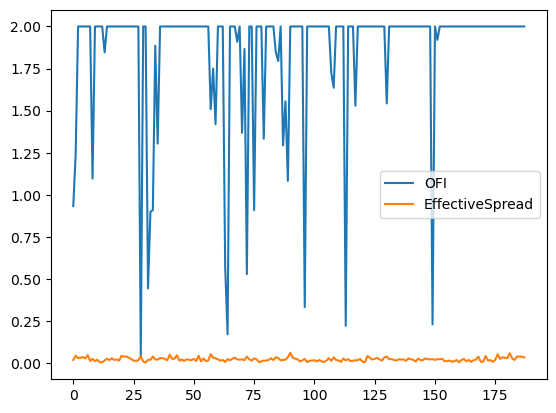

In [77]:
# ploting the OFI and the Effective spread
result_df.plot()

In [78]:
result_df['OFI'] = result_df['OFI'].astype(float)
result_df['EffectiveSpread'] = result_df['EffectiveSpread'].astype(float)

## Sept 9: Displaying the 60 first trade

In [79]:
print(result_df.head(60))

          Date       OFI  EffectiveSpread
0   1998-08-03  0.933333         0.019667
1   1998-08-04  1.243243         0.044867
2   1998-08-05  2.000000         0.031026
3   1998-08-06  2.000000         0.032591
4   1998-08-07  2.000000         0.036776
5   1998-08-10  2.000000         0.028846
6   1998-08-11  2.000000         0.047731
7   1998-08-12  2.000000         0.014063
8   1998-08-13  1.096774         0.025934
9   1998-08-14  2.000000         0.012355
10  1998-08-17  2.000000         0.020785
11  1998-08-18  2.000000         0.006202
12  1998-08-19  2.000000         0.006178
13  1998-08-20  1.846154         0.016154
14  1998-08-21  2.000000         0.026398
15  1998-08-24  2.000000         0.018824
16  1998-08-25  2.000000         0.029687
17  1998-08-26  2.000000         0.019355
18  1998-08-27  2.000000         0.022764
19  1998-08-28  2.000000         0.015485
20  1998-08-31  2.000000         0.043513
21  1998-09-01  2.000000         0.039837
22  1998-09-02  2.000000         0

Correlation between OFI and Spreads

In [80]:
correlation = result_df['OFI'].corr(result_df['EffectiveSpread'])
correlation

-0.11261998042054899

The two time series have a low negative correlation